#### Name : Muhammad Awais Akhter
##### Data Science Intern  
##### Oasis Infobyte - October P-1
##### Task 5 - Sales Prediction using Python



In [12]:
#importing necessary libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
#importing libraries for visualisation
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [13]:
#importing Data
data_frame = pd.read_csv('/content/Advertising.csv', index_col = 0)

####  Performing descriptive analysis. Understand the variables and their corresponding values.

In [14]:
# Understanding the dimensions of data
data_frame.shape

(200, 4)

In [15]:
# Understanding the Data Variables
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [16]:
data_frame.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

###### The company spent their budget for differnt products on 3 advertising medias such as TV, Radio, Newspaper and the corresponding sales for each product

In [18]:
# Show the top 5 Rows of data
data_frame.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [19]:
# Performing Descriptive Analysis
data_frame.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [10]:
# Check for Duplicated Entries
data_frame.duplicated().sum()

0

#### Outlier Analysis

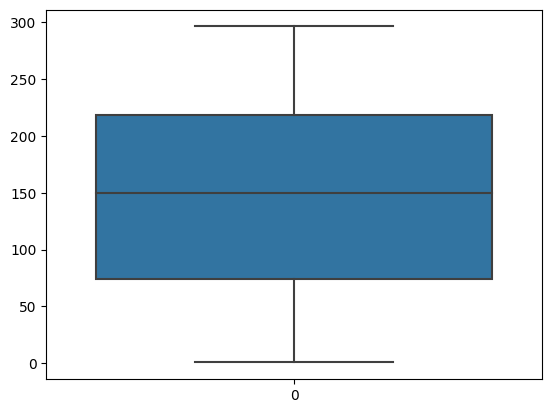

In [23]:
# Reset the index
data_frame = data_frame.reset_index(drop=True)

# Create the boxplot
fig, axs = plt.subplots(1, 1)
plt1 = sns.boxplot(data=data_frame['TV'], ax=axs)
plt.show()

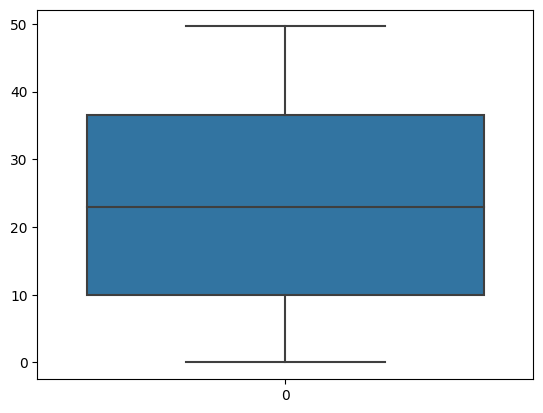

In [24]:
fig,axs=plt.subplots(1,1)
plt1=sns.boxplot(data_frame['Radio'],ax=axs)

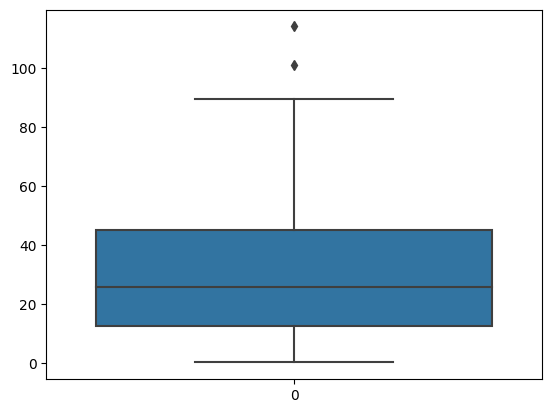

In [25]:
fig,axs=plt.subplots(1,1)
plt1=sns.boxplot(data_frame['Newspaper'],ax=axs)

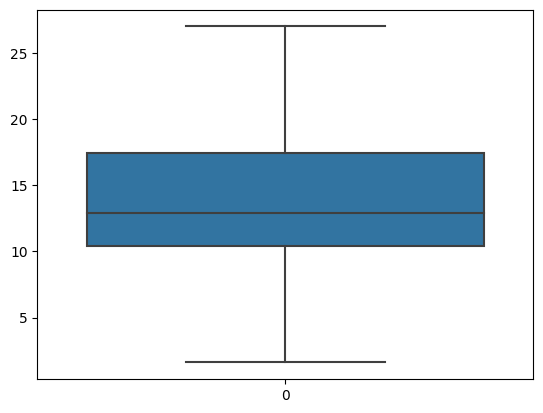

In [26]:
fig,axs=plt.subplots(1,1)
plt1=sns.boxplot(data_frame['Sales'],ax=axs)

#### Data Visualization

###### Data Visualization helps to  show how the budget spent on each advertising media affect the sales of products

<Axes: xlabel='TV', ylabel='Sales'>

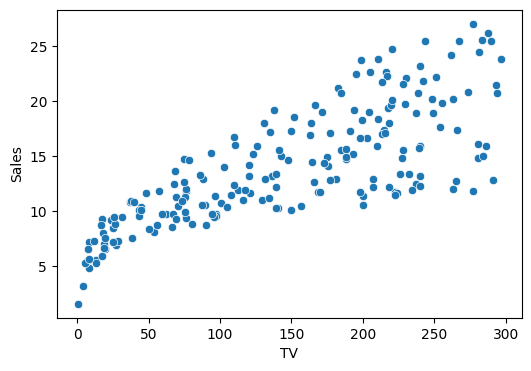

In [27]:
#Scatter plot is used find the distribution of effects of each advertising media against Target Sales variable
plt.figure(figsize=(6,4))
sns.scatterplot(data=data_frame,x=data_frame['TV'],y=data_frame['Sales'])

<Axes: xlabel='Radio', ylabel='Sales'>

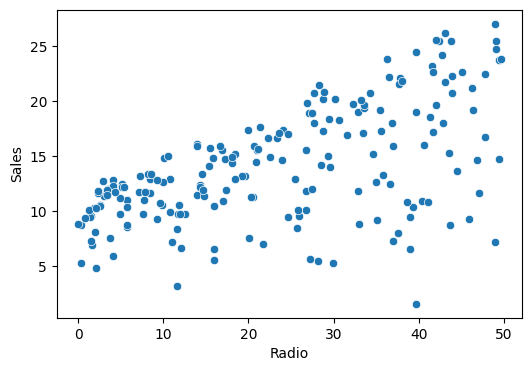

In [28]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=data_frame,x=data_frame['Radio'],y=data_frame['Sales'])

<Axes: xlabel='Newspaper', ylabel='Sales'>

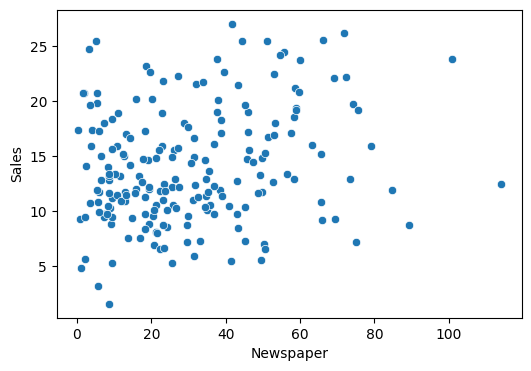

In [29]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=data_frame,x=data_frame['Newspaper'],y=data_frame['Sales'])

##### * It is seen that TV data set is more linear as compared to other 2 variables .

#### Heat Map

In [30]:
# find correlation between variables in data set for plotting heatmap
df_corr=data_frame.corr()

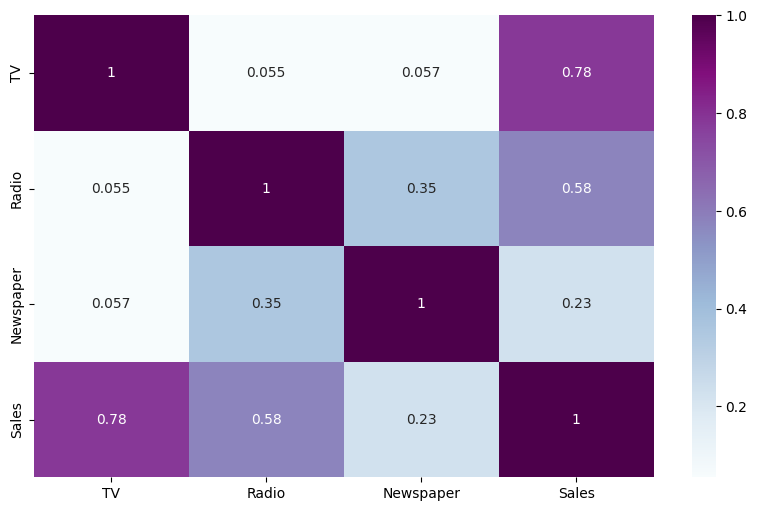

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(df_corr,annot=True,cmap="BuPu")
plt.show()

##### * We can see that TV variable has highest correlation value with the target Sales variable

#### Building the Forecasting Model

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
#First step in building the forecasting model is to identify the Feature(Input) variables and Target (Output) variable
features = data_frame[['TV', 'Radio', 'Newspaper']]
target = data_frame[['Sales']]

#####  * Splitting data for training and testing the model

In [34]:
# Splitting data for training the model and testing the model
# train size taken as 0.8
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = .8)
# Dimensions of Train and Test Data sets
print('Train set of features: ', X_train.shape)
print('Test set of features: ', X_test.shape)
print('Target for train: ', y_train.shape)
print('Target for test: ', y_test.shape)

Train set of features:  (160, 3)
Test set of features:  (40, 3)
Target for train:  (160, 1)
Target for test:  (40, 1)


### Learn the model on train data

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
# Linear Regression Model ( a Supervised Machine learning Algorithm)
# LR models impose a linear function between predictor and response variables
my_model = LinearRegression()

In [37]:
# Fitting the model in train data set ie the Linear Regression Model learned from the on Train Data
my_model.fit(X_train, y_train)

LinearRegression()

#### Predicting the Sales

In [38]:
# Predicting the sales from Feature Test values
y_pred = my_model.predict(X_test)
y_pred

array([[16.36195894],
       [ 8.73351421],
       [17.27133739],
       [ 9.24397319],
       [12.82182484],
       [15.83433185],
       [ 9.80232189],
       [10.39720156],
       [14.14540932],
       [ 4.44824304],
       [13.67562555],
       [18.99990222],
       [14.42570395],
       [18.93186955],
       [13.39311224],
       [13.8893733 ],
       [ 5.6855441 ],
       [12.71970458],
       [16.86249823],
       [17.05296663],
       [17.29848388],
       [20.67769177],
       [18.17939665],
       [12.12194874],
       [23.35812051],
       [21.06807274],
       [ 9.73145098],
       [15.89163527],
       [15.25472296],
       [16.4255297 ],
       [18.50374882],
       [13.49831776],
       [15.00519288],
       [16.79360611],
       [14.90954472],
       [ 4.38248275],
       [ 5.25572673],
       [10.62675097],
       [15.07776291],
       [12.72126008]])

#### Test the model

In [39]:
from sklearn.metrics import mean_squared_error

##### Mean Squared Error

In [40]:
# Compare the predicted values with the true values
mean_squared_error(y_pred, y_test)

2.325322575477163

##### Coefficient of Determination or R Squared Value (r2)

In [41]:
from sklearn.metrics import r2_score

In [42]:
# find Coefficient of Determination or R Squared Value (r2)
r2_score(y_test,y_pred)

0.8739524215813842